## Run cluster algorithm with Chicago taxi data
1. For Chicago data, I choose DBSCAN cluster algorithm.I want to find where passages start to take taxi more often. Because I don't kown how many cluster it will generate and distance is related, I choose DBSCAN cluster algorithm.
2. I did some pre-processing of the data since some data are missing. I add some data in pickup centroid latitude and longitude. Also, I set some hyperparameters such as eps and min_samples to get the results.
3. Clusters show which area people usually start to take taxi.
4. Clusters show which area people usually start to take taxi. If I were a taxi driver, it is very helpful because I can wait in these areas which passages always take taxi. And the result is that I expected.

In [1]:
import pandas as pd

df = pd.read_csv('chicago_taxi.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,0.0,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,0.0,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,0.0,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,360.0,1.40,NaN,NaN,28.0,8.0,...,1.0,7.75,No Charge,Star North Management LLC,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292777,5bbfd687aafb778e609425ba4621d9e291ef44c0,919ad1eb29141ee529f65193c1347a616239d89cd8c5e1...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,420.0,0.10,NaN,NaN,28.0,31.0,...,4.5,12.00,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.850266,-87.667569,POINT (-87.667569312 41.8502663663)
292778,5b49d22a619c543597c7e09731772f2453f6fbf3,5e6ba3d77c1e1597624402bd204e81b4acbc3bdb103741...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,1020.0,4.60,NaN,NaN,28.0,8.0,...,0.0,17.80,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
292779,587c59ccd2e9c2e0223817faaa58427184a642c0,111d9e472136f46b99422f1e976e81de485f57c2f7f3a8...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,720.0,2.20,1.703108e+10,1.703133e+10,8.0,33.0,...,0.0,9.75,Cash,Star North Management LLC,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
292780,585d981c08bb404e5ec19b470a67f573a16152da,2c6ef81b0ba1f2bbe58cb63f171b872e9e3f53d4c34a3c...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,805.0,3.34,NaN,NaN,8.0,7.0,...,0.0,13.80,Mobile,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [2]:
df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292782 entries, 0 to 292781
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     292782 non-null  object 
 1   Taxi ID                     292766 non-null  object 
 2   Trip Start Timestamp        292782 non-null  object 
 3   Trip End Timestamp          292777 non-null  object 
 4   Trip Seconds                292745 non-null  float64
 5   Trip Miles                  292778 non-null  float64
 6   Pickup Census Tract         184598 non-null  float64
 7   Dropoff Census Tract        183730 non-null  float64
 8   Pickup Community Area       273054 non-null  float64
 9   Dropoff Community Area      267202 non-null  float64
 10  Fare                        292754 non-null  float64
 11  Tips                        292754 non-null  float64
 12  Tolls                       292754 non-null  float64
 13  Extras        

In [4]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,292745.000000,292778.000000,1.845980e+05,1.837300e+05,273054.000000,267202.000000,292754.000000,292754.000000,292754.000000,292754.000000,292754.000000,273071.000000,273071.000000,267769.000000,267769.000000
mean,799.081173,3.359891,1.703143e+10,1.703139e+10,27.551433,22.781469,15.542138,1.781624,0.001581,1.063882,18.522244,41.897719,-87.664942,41.896504,-87.651645
std,1415.443506,5.734907,3.450098e+05,3.350400e+05,20.827618,17.246249,115.474379,2.992778,0.122615,14.287314,116.773839,0.043462,0.083364,0.040818,0.055658
min,0.000000,0.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,345.000000,0.500000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.750000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.649489,41.880994,-87.655998
50%,540.000000,1.150000,1.703132e+10,1.703128e+10,28.000000,24.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.890922,-87.632746,41.892042,-87.632746
75%,958.000000,2.870000,1.703184e+10,1.703184e+10,32.000000,32.000000,13.750000,2.000000,0.000000,1.000000,16.000000,41.899602,-87.626146,41.901207,-87.626211
max,85500.000000,634.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,9004.000000,300.000000,50.000000,4668.160000,9050.620000,42.009623,-87.534903,42.021224,-87.534903


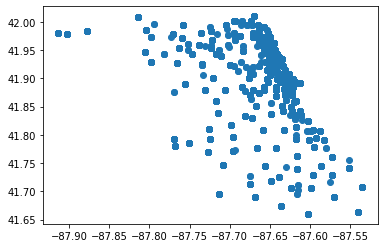

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Pickup Centroid Longitude'], df['Pickup Centroid Latitude'])
plt.show()

In [6]:
df = df.loc[:,['Pickup Centroid Longitude', 'Pickup Centroid Latitude']]
df

,Pickup Centroid Longitude,Pickup Centroid Latitude
0,-87.633308,41.899602
1,-87.633308,41.899602
2,-87.633308,41.899602
3,-87.626215,41.892508
4,-87.663518,41.874005
...,...,...
292777,-87.663518,41.874005
292778,-87.663518,41.874005
292779,-87.626215,41.892508
292780,-87.633308,41.899602


In [7]:
df['Pickup Centroid Longitude']

0        -87.633308
1        -87.633308
2        -87.633308
3        -87.626215
4        -87.663518
            ...    
292777   -87.663518
292778   -87.663518
292779   -87.626215
292780   -87.633308
292781          NaN
Name: Pickup Centroid Longitude, Length: 292782, dtype: float64

In [8]:
df['Pickup Centroid Longitude'] = df['Pickup Centroid Longitude'].fillna(-87.90)
df['Pickup Centroid Latitude'] = df['Pickup Centroid Latitude'].fillna(41.65)
df

,Pickup Centroid Longitude,Pickup Centroid Latitude
0,-87.633308,41.899602
1,-87.633308,41.899602
2,-87.633308,41.899602
3,-87.626215,41.892508
4,-87.663518,41.874005
...,...,...
292777,-87.663518,41.874005
292778,-87.663518,41.874005
292779,-87.626215,41.892508
292780,-87.633308,41.899602


In [9]:
#df = df.iloc[:,:]      # MemoryError
df = df.iloc[:100000,:] # fit smaller datasets which is 100K
df

,Pickup Centroid Longitude,Pickup Centroid Latitude
0,-87.633308,41.899602
1,-87.633308,41.899602
2,-87.633308,41.899602
3,-87.626215,41.892508
4,-87.663518,41.874005
...,...,...
99995,-87.632746,41.880994
99996,-87.633308,41.899602
99997,-87.900000,41.650000
99998,-87.619711,41.895033


In [10]:
from sklearn.cluster import DBSCAN

max_dist = 0.01
hoodsize = 9
cluster = DBSCAN(eps = max_dist, min_samples = hoodsize)
cluster.fit(df)

print(cluster.labels_)

[0 0 0 ... 1 0 0]


## Run cluster algorithm with Finnish location data
1. For Finnish location data, I choose Hierarchy cluster algorithm. Because I don't kown how many cluster it will generate and I can choose how many clusters as I want from the result of the Hierarchy cluster algorithm, I choose Hierarchy cluster algorithm.
2. I didn't do any pre-processing of the data since the data is enough. Also, I set a hyperparameters which is linkage method.
3. Clusters show which areas people are located.
4. Clusters show which areas people are located. If I were a city planner and decide to distribute the power stations and water stations, it is very helpful because I can not only decide how many clusters it will be but also can decide how large these stations will be due to the population of each cluster. And the result is that I expected.

In [14]:
import pandas as pd

df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t', header=None)
df

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [15]:
df.describe()

,0,1
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       13467 non-null  int64
 1   1       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


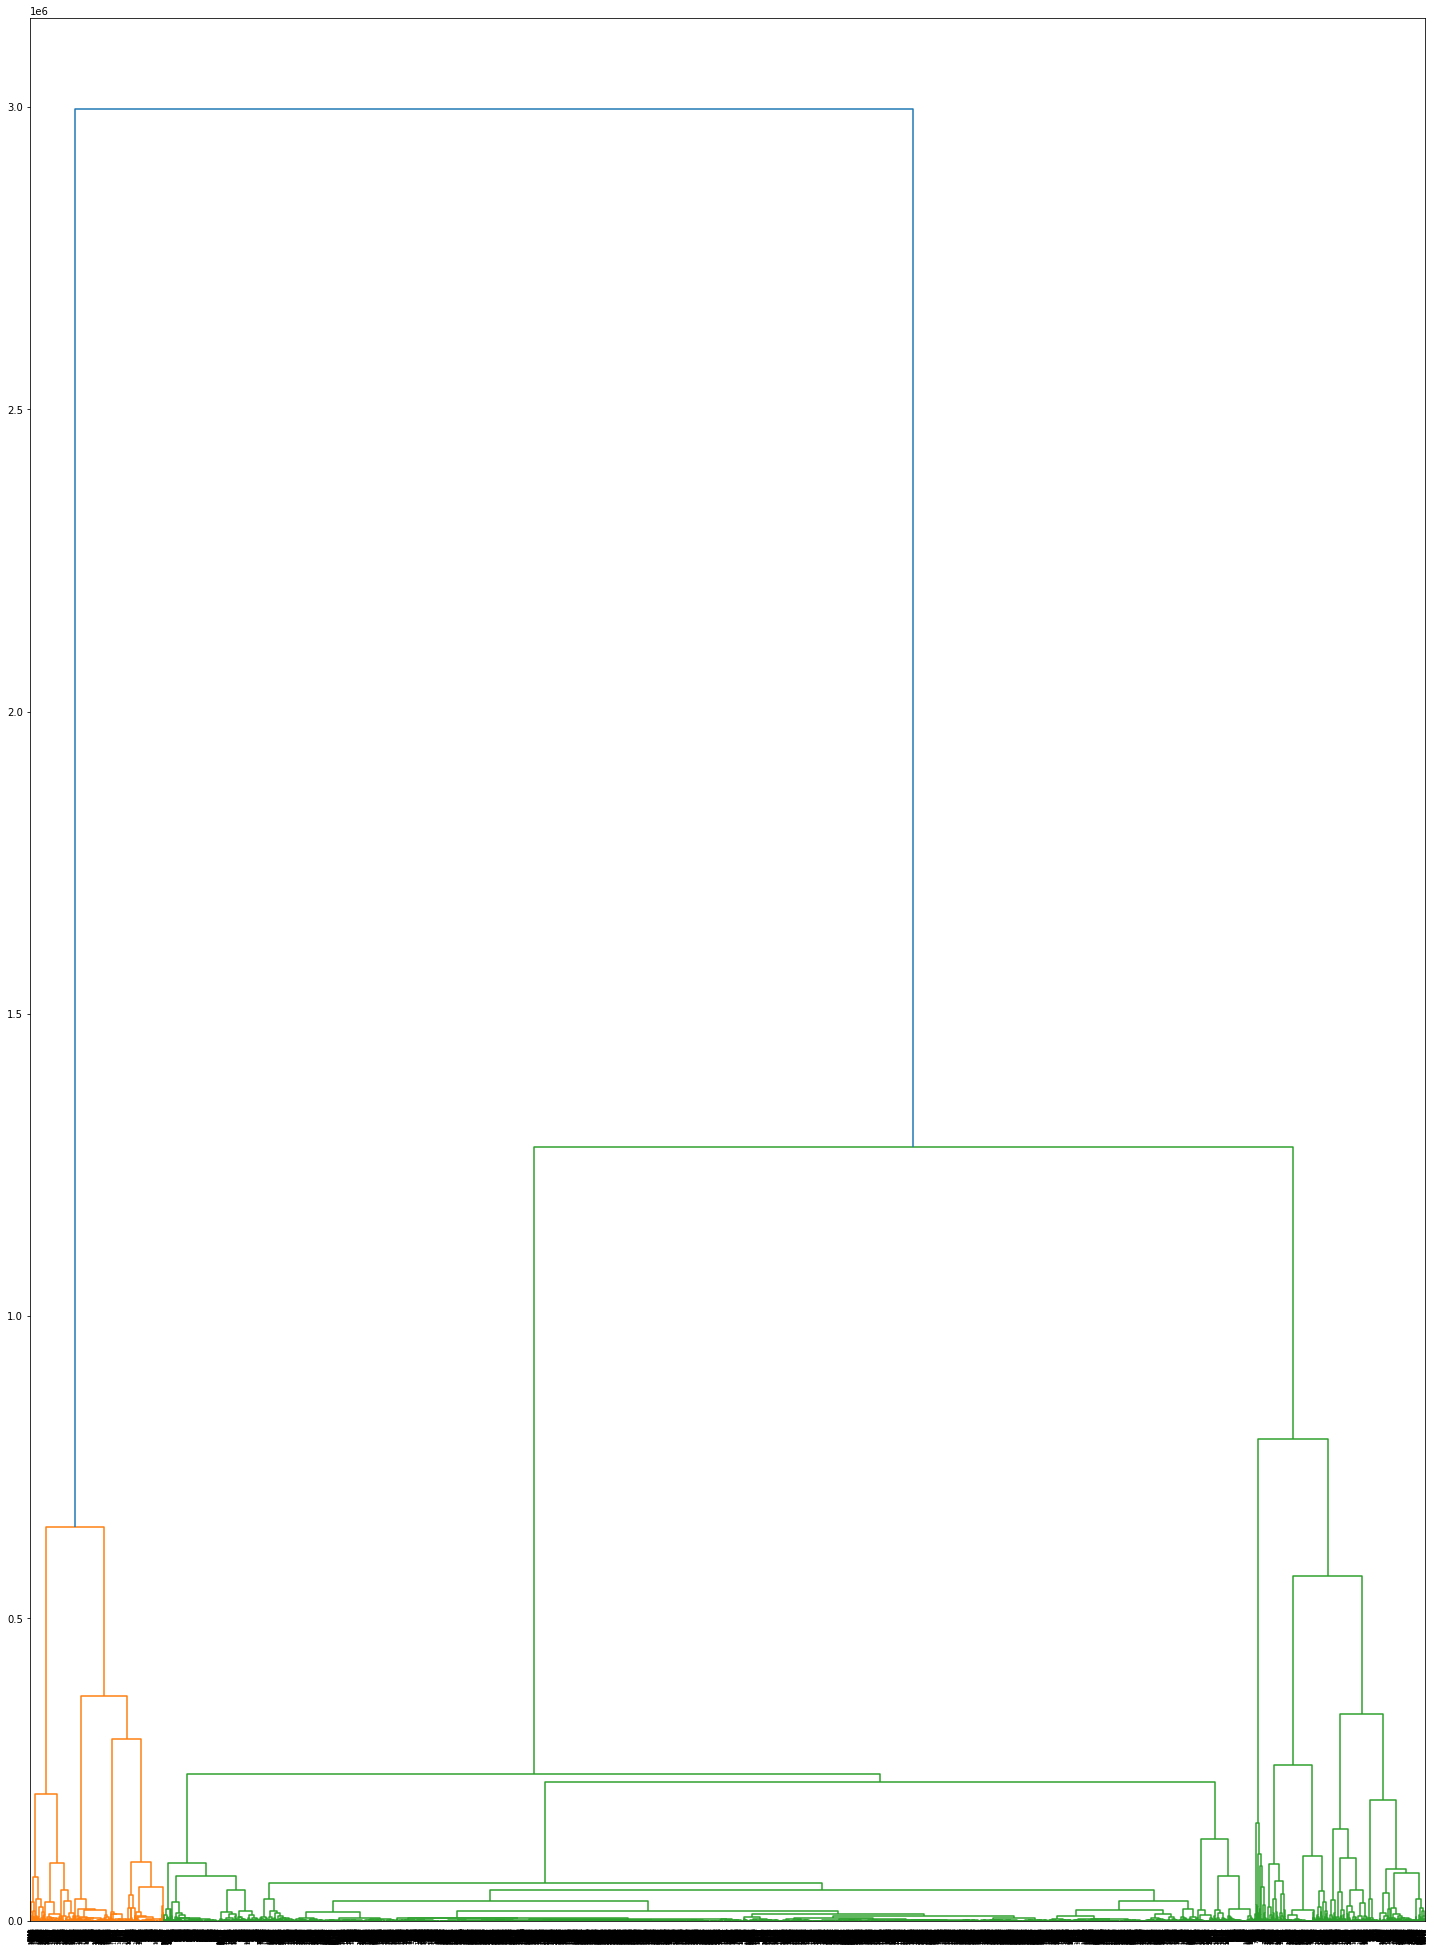

In [17]:
#df = df.iloc[:30,[0,1]]

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 35))
den = dendrogram(linkage(df, method='ward'))
plt.show()